In [1]:
'''
Load data
'''
import json
with open("fileStats.json", "r") as f:
    content = f.read()
    data = json.loads(content)


In [2]:
import string
def updateDict(d, items):
    for item in items:
        if item not in d.keys():
            d[item] = 0

def updateCounts(d, items, counts):
    for i in range(0, len(counts)):
        d[items[i]] += counts[i]

def digitDict():
    d = {}
    for i in range(0,10):
        d[i] = 0
    return d

def charDict():
    d = {}
    chars = [x for x in string.ascii_lowercase]
    for char in chars:
        d[char] = 0
    return d

In [3]:
'''
Aggregate all data
'''
aggData = {'Words': {}, 'Numbers': {}, 'Characters': charDict(), 'Digits': digitDict()}
numEntries = len(data['stats'])
c = 0
for entry in data['stats']:
    # Log
    c += 1
    print(f'Processing file {c} of {numEntries}')

    # Get words
    words = entry['allWords']
    wordCounts = entry['wordCounts']

    # Update word dictionary
    updateDict(aggData['Words'], words)
    updateCounts(aggData['Words'], words, wordCounts)

    # Get numbers
    numbers = entry['allNumbers']
    numCounts = entry['numCounts']

    # Update number dictionary
    updateDict(aggData['Numbers'], numbers)
    updateCounts(aggData['Numbers'], numbers, numCounts)

    # Update digits
    for num in numbers:
        firstDigit = int(str(num)[0])
        aggData['Digits'][firstDigit] += 1
    
    # Update first character
    for word in words:
        firstChar = word[0]
        aggData['Characters'][firstChar] += 1

# Write to aggregate JSON
jsonString = json.dumps(aggData)
with open("aggStats.json", "w") as f:
    f.write(jsonString)

Processing file 1 of 237
Processing file 2 of 237
Processing file 3 of 237
Processing file 4 of 237
Processing file 5 of 237
Processing file 6 of 237
Processing file 7 of 237
Processing file 8 of 237
Processing file 9 of 237
Processing file 10 of 237
Processing file 11 of 237
Processing file 12 of 237
Processing file 13 of 237
Processing file 14 of 237
Processing file 15 of 237
Processing file 16 of 237
Processing file 17 of 237
Processing file 18 of 237
Processing file 19 of 237
Processing file 20 of 237
Processing file 21 of 237
Processing file 22 of 237
Processing file 23 of 237
Processing file 24 of 237
Processing file 25 of 237
Processing file 26 of 237
Processing file 27 of 237
Processing file 28 of 237
Processing file 29 of 237
Processing file 30 of 237
Processing file 31 of 237
Processing file 32 of 237
Processing file 33 of 237
Processing file 34 of 237
Processing file 35 of 237
Processing file 36 of 237
Processing file 37 of 237
Processing file 38 of 237
Processing file 39 of

NameError: name 'fit' is not defined

Digit: 1
	Expected: 30.10% Actual: 31.56% Deviation: 1.46% 

Digit: 2
	Expected: 17.61% Actual: 16.58% Deviation: 1.03% 

Digit: 3
	Expected: 12.49% Actual: 12.76% Deviation: 0.27% 

Digit: 4
	Expected: 9.69% Actual: 12.34% Deviation: 2.65% 

Digit: 5
	Expected: 7.92% Actual: 9.44% Deviation: 1.52% 

Digit: 6
	Expected: 6.69% Actual: 5.32% Deviation: 1.37% 

Digit: 7
	Expected: 5.80% Actual: 4.04% Deviation: 1.76% 

Digit: 8
	Expected: 5.12% Actual: 3.08% Deviation: 2.04% 

Digit: 9
	Expected: 4.58% Actual: 4.88% Deviation: 0.30% 

Top 10 words:
[('of', 8834), ('in', 8078), ('to', 7886), ('and', 7728), ('a', 7572), ('matlab', 5624), ('english', 4740), ('is', 4232), ('as', 4018)]
Rank of MATLAB: 7
Rank of tracker: 102
Rank of objectTrack: 462
Rank of objectDetection: 149


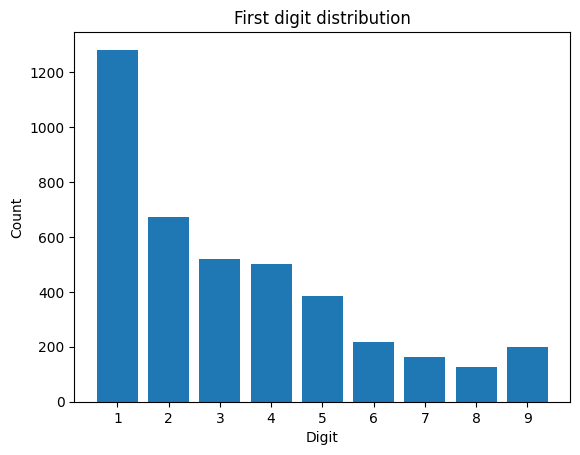

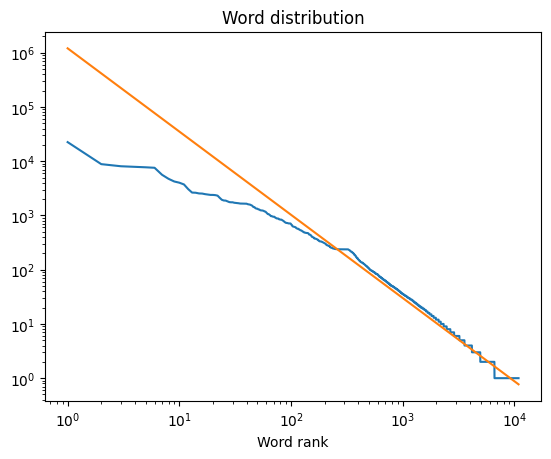

In [74]:
''' Plot aggregate data '''
from Plotter import Plotter
import json
import matplotlib.pyplot as plt
import numpy as np
import math

np.set_printoptions(3)

# Load data
with open("aggStats.json", "r") as f:
    content = f.read()
    aggData = json.loads(content)

# Set up plotter
plotter = Plotter()

# Benford's law: First digit - TODO: Remove 0 from calculateion
plt.figure()
digitCounts = list(aggData['Digits'].values())
digitCounts = digitCounts[1:]  # Remove 0
plotter.plotDigitDistribution(digitCounts)

# Print expected vs actual digit distribution
expDistribution = np.zeros(10)
for digit in range(1, 10):
    expDistribution[digit-1] = 100 * math.log10(1 + 1 / digit)

actDistribution = 100 * np.array(digitCounts) / np.sum(digitCounts)

for idx, item in enumerate(actDistribution):
    expected = expDistribution[idx] 
    actual = item
    deviation = abs(actual - expected)
    print(f'Digit: {idx+1}\n\tExpected: {expected:.2f}% Actual: {item:.2f}% Deviation: {deviation:.2f}% \n')

# Zipf's law: Word frequency
wordCounts = list(aggData['Words'].values())
f = plt.figure()
plotter.plotWordDistribution(wordCounts, "All", False) # Log-log line

# Fit word log of word frequency to a line
logCounts = np.log10(wordCounts)
logRank = np.log10(list(range(1, len(wordCounts) + 1)))
fit = np.polyfit(logRank, logCounts, 1)
fitX = np.linspace(1, len(wordCounts), len(wordCounts))
fitY = pow(fitX, fit[0]) * pow(10, fit[1])

ax = f.axes[0]
ax.plot(fitX, fitY)

# Compute word rank
words = aggData['Words']
ranked_words = sorted(
        words.items(),
        key=lambda item: item[1],
        reverse=True
    )

wordsByRank = words
for idx,pair in enumerate(ranked_words):
    wordsByRank[pair[0]] = idx + int(1)

# Show the top 10 words
print(f'Top 10 words:\n{ranked_words[1:10]}')

# Show the ranks of some common tracking words
def lookupRank(ranking, word):
    rank = ranking[word.lower()]
    print(f'Rank of {word}: {rank}')

lookupRank(wordsByRank, 'MATLAB')
lookupRank(wordsByRank, 'tracker')
lookupRank(wordsByRank, 'objectTrack')
lookupRank(wordsByRank, 'objectDetection')


463